In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(lubridate)
library(tidyverse)

R[write to console]: 
Attaching package: ‘lubridate’


R[write to console]: The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



In [ ]:
%%R
setwd("/content/drive/MyDrive/tripdatcyc/2016")
list.files()

[1] "Divvy_Stations_2016_Q3.csv" "Divvy_Trips_2016_04.csv"   
[3] "Divvy_Trips_2016_05.csv"    "Divvy_Trips_2016_06.csv"   
[5] "Divvy_Trips_2016_Q1.csv"    "Divvy_Trips_2016_Q3.csv"   
[7] "Divvy_Trips_2016_Q4.csv"    "README_2016_Q3.txt"        
[9] "README_2016_Q4.txt"        


In [ ]:
%%R
trip17q1 = read_csv("Divvy_Trips_2016_Q1.csv")
trip17q2 = rbind(read_csv("Divvy_Trips_2016_04.csv"),
                 read_csv("Divvy_Trips_2016_05.csv"),
                 read_csv("Divvy_Trips_2016_06.csv"))
trip17q3 = read_csv("Divvy_Trips_2016_Q3.csv")
trip17q4 = read_csv("Divvy_Trips_2016_Q4.csv")

Rows: 396913 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): starttime, stoptime, from_station_name, to_station_name, usertype, ...
dbl (6): trip_id, bikeid, tripduration, from_station_id, to_station_id, birt...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 231635 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): starttime, stoptime, from_station_name, to_station_name, usertype, ...
dbl (6): trip_id, bikeid, tripduration, from_station_id, to_station_id, birt...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 363319 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6)

In [ ]:
%%R
print(names(trip17q1))
print(names(trip17q2))
print(names(trip17q3))
print(names(trip17q4))

 [1] "trip_id"           "starttime"         "stoptime"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"        
 [1] "trip_id"           "starttime"         "stoptime"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"        
 [1] "trip_id"           "starttime"         "stoptime"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"        
 [1] "trip_id"           "starttime"         "stoptime"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          

In [ ]:
%%R
trip17=rbind(trip17q1,trip17q2,trip17q3,trip17q4)

In [ ]:
%%R
str(trip17)

spec_tbl_df [3,595,383 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ trip_id          : num [1:3595383] 9080551 9080550 9080549 9080548 9080547 ...
 $ starttime        : chr [1:3595383] "3/31/2016 23:53" "3/31/2016 23:46" "3/31/2016 23:42" "3/31/2016 23:37" ...
 $ stoptime         : chr [1:3595383] "4/1/2016 0:07" "3/31/2016 23:57" "3/31/2016 23:46" "3/31/2016 23:55" ...
 $ bikeid           : num [1:3595383] 155 4831 4232 3464 1750 ...
 $ tripduration     : num [1:3595383] 841 649 210 1045 202 ...
 $ from_station_id  : num [1:3595383] 344 128 350 303 334 67 156 200 145 90 ...
 $ from_station_name: chr [1:3595383] "Ravenswood Ave & Lawrence Ave" "Damen Ave & Chicago Ave" "Ashland Ave & Chicago Ave" "Broadway & Cornelia Ave" ...
 $ to_station_id    : num [1:3595383] 458 213 210 458 329 304 166 411 212 174 ...
 $ to_station_name  : chr [1:3595383] "Broadway & Thorndale Ave" "Leavitt St & North Ave" "Ashland Ave & Division St" "Broadway & Thorndale Ave" ...
 $ usertype         : chr [1:

In [ ]:
%%R
strptime("3/31/2016 23:53",format="%m/%d/%Y %H:%M")

[1] "2016-03-31 23:53:00 UTC"


In [ ]:
%%R
trip17$starttime = strptime(trip17$starttime,format="%m/%d/%Y %H:%M")
trip17$stoptime = strptime(trip17$stoptime,format="%m/%d/%Y %H:%M")

In [ ]:
%%R
print(dim(trip17)[1])
print(length(unique(trip17$trip_id)))

[1] 3595383
[1] 3595333


In [ ]:
#remove columns for anonymization
%%R
trip17 = trip17[,c(-11,-12)]

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



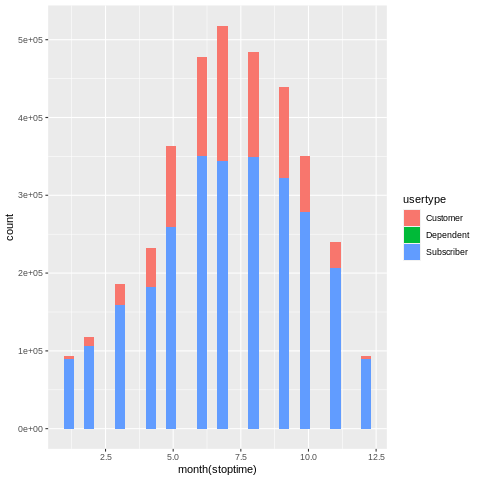

In [ ]:
#ggplot histogram
%%R
ggplot(data=trip17)+geom_histogram(mapping=aes(x=month(stoptime),fill=usertype))

In [ ]:
#saving the whole csv
%%R
print(names(trip17))
write_csv(trip17,"triptotal16.csv")

 [1] "trip_id"           "starttime"         "stoptime"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"         
